In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'online_advertising_performance_data.csv'
df = pd.read_csv(file_path)

# Display the first few rows to understand the structure of the dataset
df.head()

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,Unnamed: 12,Unnamed: 13
0,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000,NaN,NaN
1,April,1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602,NaN,NaN
2,April,1,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636,NaN,NaN
3,April,1,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234,NaN,NaN
4,April,1,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000,NaN,NaN


In [2]:
# Clean the dataset by removing unnecessary columns
df_cleaned = df.drop(columns=['Unnamed: 12', 'Unnamed: 13'])

# Convert relevant columns to appropriate data types for analysis
df_cleaned['cost'] = pd.to_numeric(df_cleaned['cost'], errors='coerce')
df_cleaned['clicks'] = pd.to_numeric(df_cleaned['clicks'], errors='coerce')
df_cleaned['revenue'] = pd.to_numeric(df_cleaned['revenue'], errors='coerce')
df_cleaned['post_click_conversions'] = pd.to_numeric(df_cleaned['post_click_conversions'], errors='coerce')
df_cleaned['post_click_sales_amount'] = pd.to_numeric(df_cleaned['post_click_sales_amount'], errors='coerce')

# Group data by date for time-based analysis
df_cleaned['date'] = pd.to_datetime(df_cleaned['day'].astype(str) + '-' + df_cleaned['month'], format='%d-%B')

# Sort the data by date for trend analysis
df_cleaned.sort_values('date', inplace=True)

# Display the cleaned data for verification
df_cleaned.head()

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,date
0,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0,1900-04-01
131,April,1,camp 3,Low,160 x 600,def,11834,0.6988,21,1.1008,0,0.0,1900-04-01
132,April,1,camp 3,Low,160 x 600,ghi,35,0.0460,0,0.0000,0,0.0,1900-04-01
133,April,1,camp 3,Low,160 x 600,mno,41489,2.2941,167,8.7543,0,0.0,1900-04-01
134,April,1,camp 3,Medium,160 x 600,abc,5,0.0064,0,0.0000,0,0.0,1900-04-01


user_engagement     High     Low   Medium
date                                     
1900-04-01       2365528  697429  2466068
1900-04-02       2039643  655471  2243749
1900-04-03       2236511  781657  2727435
1900-04-04       2616203  832377  3082984
1900-04-05       2517938  695377  2840221
...                  ...     ...      ...
1900-06-26        752584   44777   145721
1900-06-27       1145216   80518   263242
1900-06-28       1113334   50089   189643
1900-06-29        974739   50898   181381
1900-06-30       1003562   56394   200082

[91 rows x 3 columns]


<Figure size 1200x600 with 0 Axes>

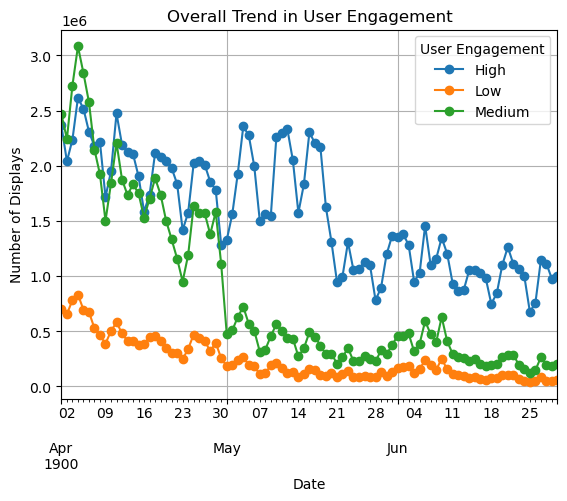

In [3]:
import numpy as np
# Question 1: Overall trend in user engagement throughout the campaign period
user_engagement_trend = df_cleaned.groupby(['date', 'user_engagement'])['displays'].sum().unstack().fillna(0)
print(user_engagement_trend)

plt.figure(figsize=(12, 6))
user_engagement_trend.plot(kind='line', marker='o')
plt.title('Overall Trend in User Engagement')
plt.xlabel('Date')
plt.ylabel('Number of Displays')
plt.legend(title='User Engagement')
plt.grid(True)
plt.show()

banner
160 x 600     239570
240 x 400    1113256
300 x 250     411214
468 x 60        1295
580 x 400     120681
670 x 90       37203
728 x 90      569606
800 x 250         12
Name: clicks, dtype: int64


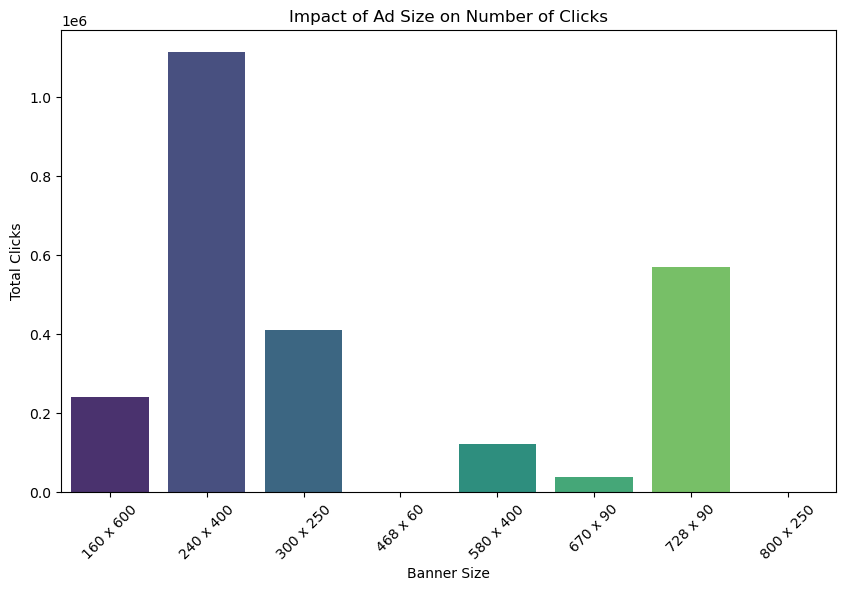

In [4]:
# Question 2: Impact of ad size (banner) on the number of clicks generated
banner_clicks = df_cleaned.groupby('banner')['clicks'].sum()
print(banner_clicks)
plt.figure(figsize=(10, 6))
sns.barplot(x=banner_clicks.index, y=banner_clicks.values, palette='viridis')
plt.title('Impact of Ad Size on Number of Clicks')
plt.xlabel('Banner Size')
plt.ylabel('Total Clicks')
plt.xticks(rotation=45)
plt.show()

In [5]:
# Question 3: Publisher spaces (placements) with the highest number of displays and clicks
placement_displays_clicks = df_cleaned.groupby('placement').agg({'displays': 'sum', 'clicks': 'sum'}).sort_values(by='displays', ascending=False)
print(placement_displays_clicks)

            displays   clicks
placement                    
mno        143161775   993039
ghi         59740415  1247049
def         28177492   176097
jkl          7692732    75063
abc           242142     1584


0.7605199343382221


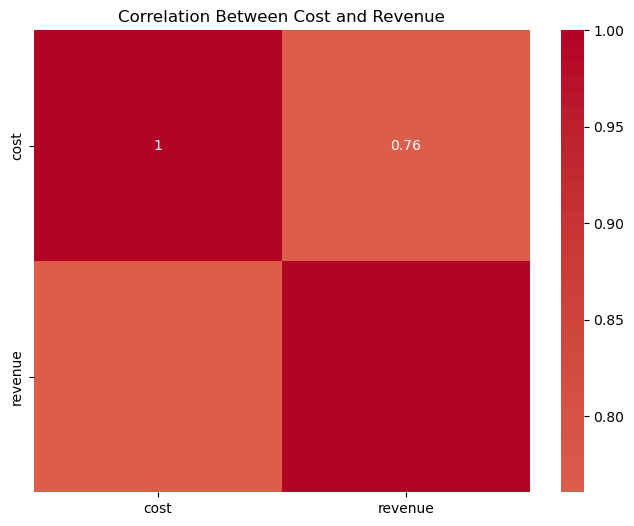

In [6]:
# Question 4: Correlation between the cost of serving ads and revenue generated from clicks
cost_revenue_corr = df_cleaned[['cost', 'revenue']].corr().iloc[0, 1]
print(cost_revenue_corr)
plt.figure(figsize=(8, 6))
sns.heatmap(df_cleaned[['cost', 'revenue']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Cost and Revenue')
plt.show()

In [7]:
# Question 5: Average revenue generated per click for Company X during the campaign period
average_revenue_per_click = df_cleaned['revenue'].sum() / df_cleaned['clicks'].sum()
print(average_revenue_per_click)
# Just print the result
print(f'Average Revenue per Click: ${average_revenue_per_click:.2f}')


0.1108233559193802
Average Revenue per Click: $0.11


campaign_number
camp 1         inf
camp 3    0.045453
camp 2    0.020079
Name: conversion_rate, dtype: float64


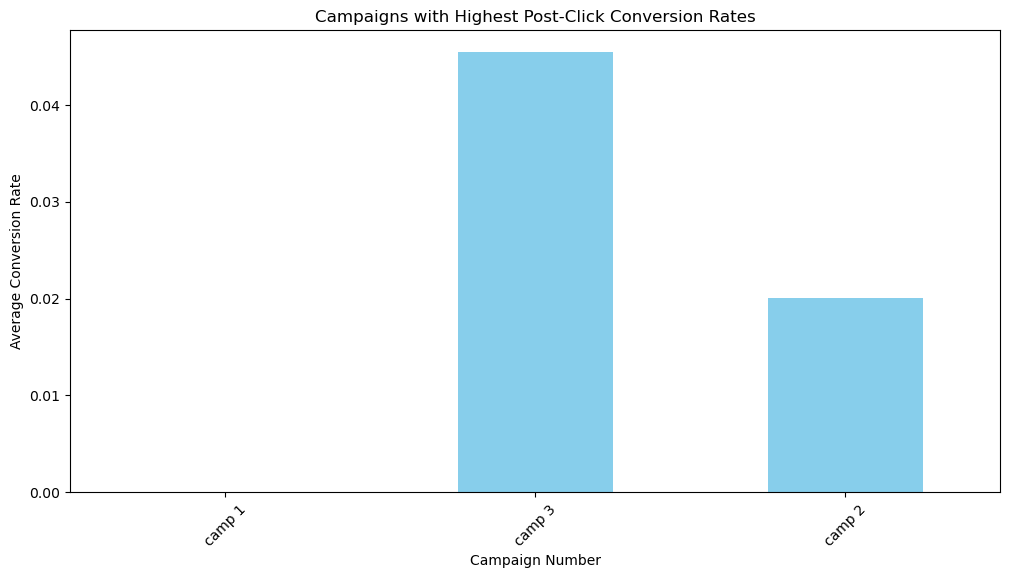

In [8]:
# Question 6: Campaigns with the highest post-click conversion rates
df_cleaned['conversion_rate'] = df_cleaned['post_click_conversions'] / df_cleaned['clicks']
top_conversion_campaigns = df_cleaned.groupby('campaign_number')['conversion_rate'].mean().sort_values(ascending=False)
print(top_conversion_campaigns)
plt.figure(figsize=(12, 6))
top_conversion_campaigns.plot(kind='bar', color='skyblue')
plt.title('Campaigns with Highest Post-Click Conversion Rates')
plt.xlabel('Campaign Number')
plt.ylabel('Average Conversion Rate')
plt.xticks(rotation=45)
plt.show()


date
1900-04-01    531410.5466
1900-04-02    466908.9690
1900-04-03    530984.9128
1900-04-04    537908.7395
1900-04-05    575301.4028
                 ...     
1900-06-26    211969.3014
1900-06-27    294567.5051
1900-06-28    275890.7343
1900-06-29    225088.4150
1900-06-30    248297.3469
Name: post_click_sales_amount, Length: 91, dtype: float64


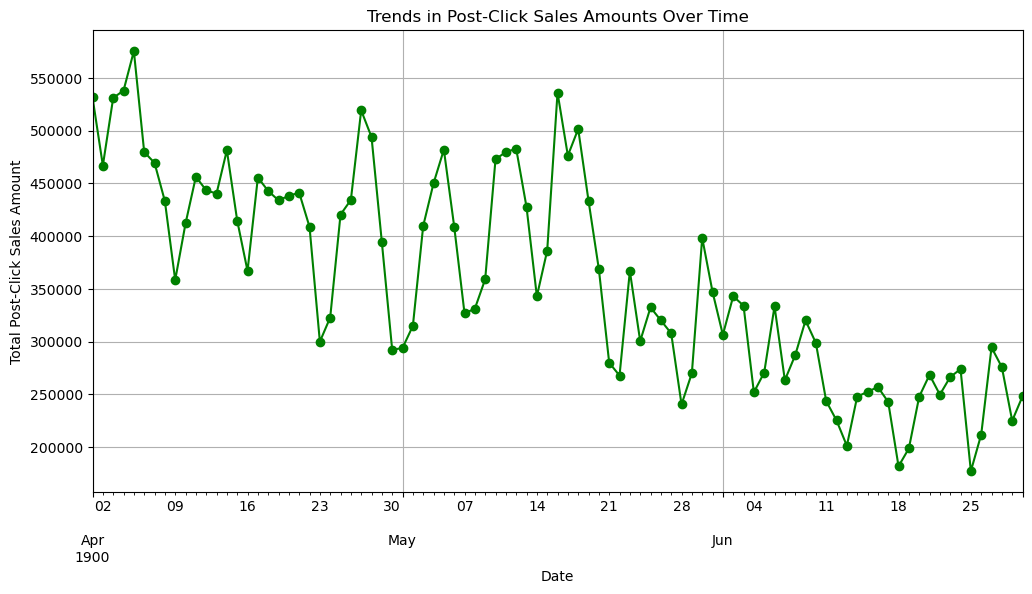

In [9]:
# Question 7: Trends or patterns in post-click sales amounts over time
post_click_sales_trend = df_cleaned.groupby('date')['post_click_sales_amount'].sum()
print(post_click_sales_trend)
plt.figure(figsize=(12, 6))
post_click_sales_trend.plot(kind='line', marker='o', color='green')
plt.title('Trends in Post-Click Sales Amounts Over Time')
plt.xlabel('Date')
plt.ylabel('Total Post-Click Sales Amount')
plt.grid(True)
plt.show()


user_engagement      High      Low    Medium
banner                                      
160 x 600        13636846  3885009  11261998
240 x 400        43376364  3768428  18638628
300 x 250        30687934  6134430  18016045
468 x 60           426815    54067    214244
580 x 400         3699750   832625   2657322
670 x 90          3197828   590984   1716160
728 x 90         46950771  6241049  23028304
800 x 250             992      407       725


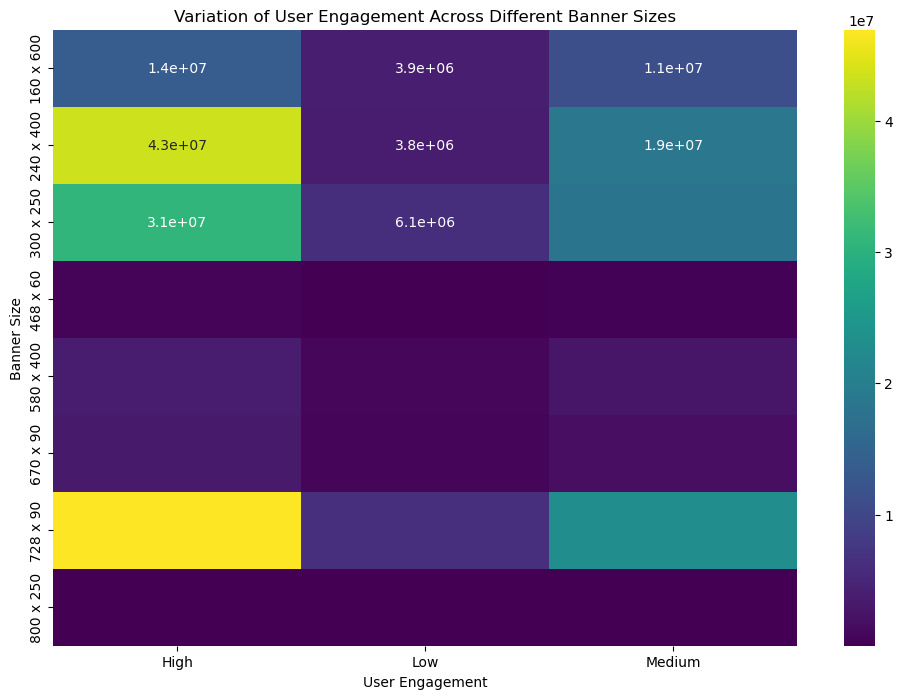

In [10]:
# Question 8: Variation of user engagement across different banner sizes
engagement_banner = df_cleaned.groupby(['banner', 'user_engagement'])['displays'].sum().unstack().fillna(0)
print(engagement_banner)
plt.figure(figsize=(12, 8))
sns.heatmap(engagement_banner, annot=True, cmap='viridis')
plt.title('Variation of User Engagement Across Different Banner Sizes')
plt.xlabel('User Engagement')
plt.ylabel('Banner Size')
plt.show()

In [11]:
# Question 9: Placement types with the highest post-click conversion rates
placement_conversion_rate = df_cleaned.groupby('placement')['conversion_rate'].mean().sort_values(ascending=False)
print(placement_conversion_rate)

placement
abc    inf
def    inf
ghi    inf
jkl    inf
mno    inf
Name: conversion_rate, dtype: float64


In [12]:
# Question 10: Seasonal patterns or fluctuations in displays and clicks
displays_clicks_trend = df_cleaned.groupby('date').agg({'displays': 'sum', 'clicks': 'sum'})
print(displays_clicks_trend)

            displays  clicks
date                        
1900-04-01   5529025   70959
1900-04-02   4938863   61968
1900-04-03   5745603   73219
1900-04-04   6531564   84224
1900-04-05   6053536   78538
...              ...     ...
1900-06-26    943082    7080
1900-06-27   1488976   11738
1900-06-28   1353066   10032
1900-06-29   1207018    7591
1900-06-30   1260038    9366

[91 rows x 2 columns]


In [13]:
# Question 11: Correlation between user engagement levels and revenue generated
engagement_revenue_corr = df_cleaned.groupby('user_engagement').agg({'revenue': 'sum', 'displays': 'sum'})
engagement_revenue_corr['corr'] = engagement_revenue_corr.corr().iloc[0, 1]
print(engagement_revenue_corr)

                     revenue   displays      corr
user_engagement                                  
High             212263.8837  141977300  0.977688
Low                5146.2289   21506999  0.977688
Medium            58854.4495   75533426  0.977688


cost       12.019849
clicks     19.778482
revenue    21.473882
dtype: float64


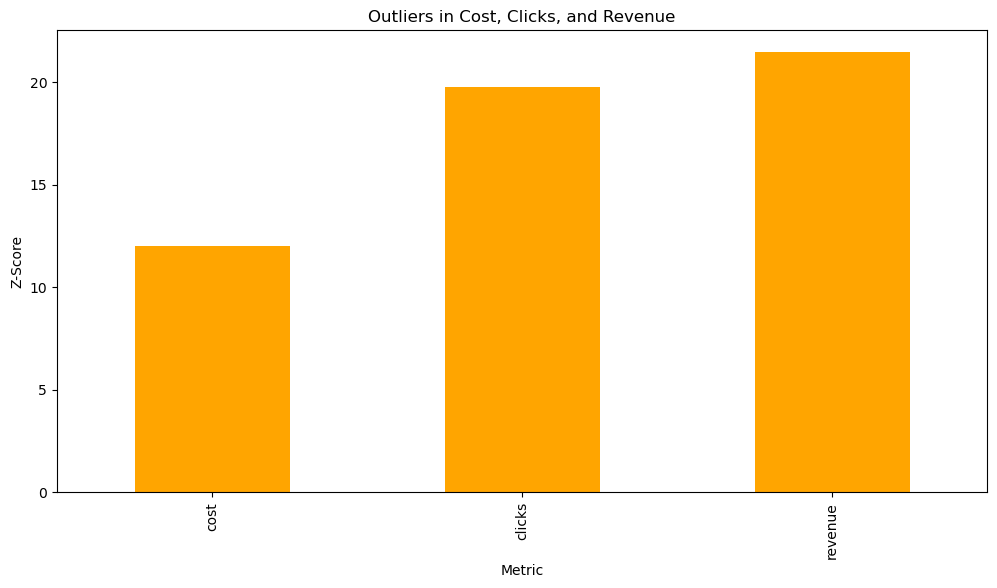

In [14]:
# Question 12: Outliers in terms of cost, clicks, or revenue
outliers_cost = df_cleaned[['cost', 'clicks', 'revenue']].apply(lambda x: np.abs(x - x.mean()) / x.std()).max()
print(outliers_cost)
plt.figure(figsize=(12, 6))
outliers_cost.plot(kind='bar', color='orange')
plt.title('Outliers in Cost, Clicks, and Revenue')
plt.xlabel('Metric')
plt.ylabel('Z-Score')
plt.show()

                                     displays  clicks     revenue  \
campaign_number banner    placement                                 
camp 1          240 x 400 ghi        25844006  557480  91362.4930   
                728 x 90  ghi        15804297  187807  30004.9454   
                300 x 250 mno        22557248  132609  21519.7489   
                728 x 90  mno        24450802  112202  18376.1787   
                160 x 600 mno        11419510   89886  15079.9859   
...                                       ...     ...         ...   
camp 3          468 x 60  jkl               6       0      0.0000   
                160 x 600 abc             220       0      0.0000   
camp 1          800 x 250 ghi              17       0      0.0000   
                160 x 600 jkl               1       0      0.0000   
                          abc             921       0      0.0000   

                                     conversion_rate  
campaign_number banner    placement            

<Figure size 1400x800 with 0 Axes>

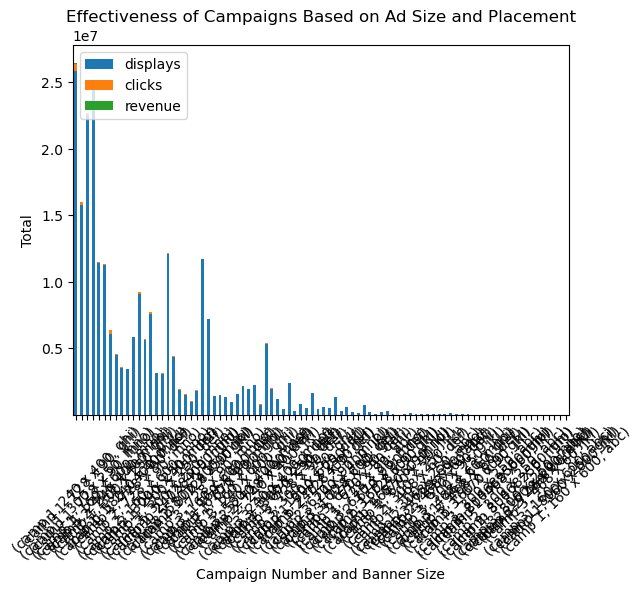

In [15]:
# Question 13: Effectiveness of campaigns based on ad size and placement type
campaign_banner_effectiveness = df_cleaned.groupby(['campaign_number', 'banner', 'placement']).agg({
    'displays': 'sum',
    'clicks': 'sum',
    'revenue': 'sum',
    'conversion_rate': 'mean'
}).sort_values(by='revenue', ascending=False)
print(campaign_banner_effectiveness)
plt.figure(figsize=(14, 8))
campaign_banner_effectiveness[['displays', 'clicks', 'revenue']].plot(kind='bar', stacked=True)
plt.title('Effectiveness of Campaigns Based on Ad Size and Placement')
plt.xlabel('Campaign Number and Banner Size')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

In [16]:
# Question 14: Consistent outperformance of campaigns or banner sizes in terms of ROI
df_cleaned['roi'] = df_cleaned['revenue'] / df_cleaned['cost']
top_roi_campaigns = df_cleaned.groupby(['campaign_number', 'banner']).agg({'roi': 'mean'}).sort_values(by='roi', ascending=False)
print(top_roi_campaigns)

                                roi
campaign_number banner             
camp 3          800 x 250       inf
                160 x 600  4.096757
camp 1          160 x 600  3.931911
camp 2          580 x 400  3.113678
camp 3          580 x 400  3.004255
camp 1          240 x 400  2.531187
                300 x 250  2.171725
                580 x 400  2.070334
camp 2          240 x 400  1.906611
                670 x 90   1.851741
camp 3          670 x 90   1.803126
camp 1          468 x 60   1.686660
                670 x 90   1.672810
camp 2          300 x 250  1.663251
camp 1          728 x 90   1.659274
camp 3          300 x 250  1.530613
camp 2          160 x 600  1.511291
camp 3          468 x 60   1.471043
camp 2          728 x 90   1.267882
camp 3          240 x 400  1.223359
                728 x 90   1.134756
camp 2          468 x 60   1.096815
                800 x 250  0.913420
camp 1          800 x 250  0.173533


In [17]:
# Question 15: Distribution of post-click conversions across different placement types
placement_conversion_distribution = df_cleaned.groupby('placement')['post_click_conversions'].sum().sort_values(ascending=False)
print(placement_conversion_distribution)

placement
ghi    337063
mno    263170
def     29856
jkl     20853
abc       824
Name: post_click_conversions, dtype: int64


user_engagement
High      42321549
Low        5857572
Medium    21531622
Name: displays, dtype: int64
user_engagement
High      99655751
Low       15649427
Medium    54001804
Name: displays, dtype: int64


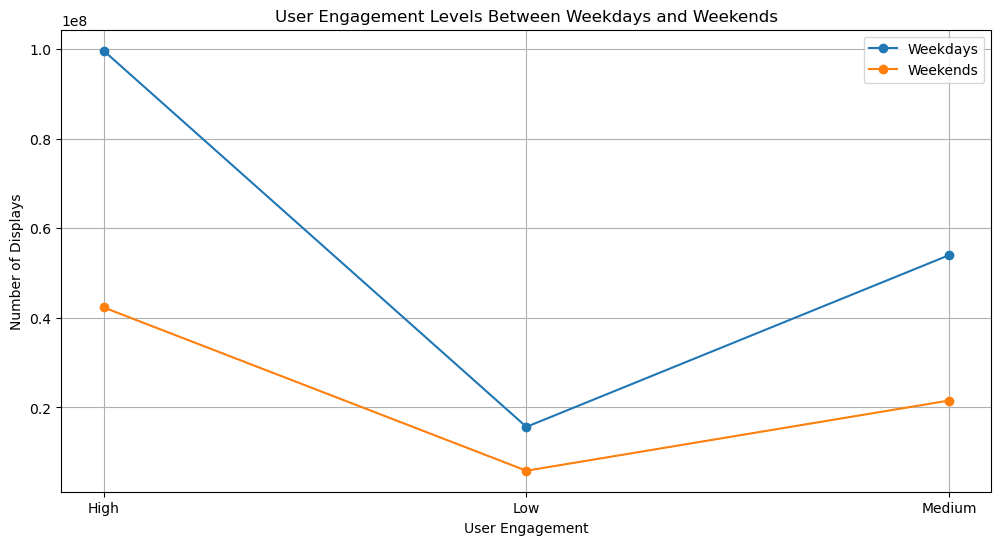

In [18]:
# Question 16: Differences in user engagement levels between weekdays and weekends
df_cleaned['weekday'] = df_cleaned['date'].dt.weekday
weekend_engagement = df_cleaned[df_cleaned['weekday'] >= 5].groupby('user_engagement')['displays'].sum()
weekday_engagement = df_cleaned[df_cleaned['weekday'] < 5].groupby('user_engagement')['displays'].sum()
print(weekend_engagement)
print(weekday_engagement)
plt.figure(figsize=(12, 6))
plt.plot(weekday_engagement.index, weekday_engagement.values, label='Weekdays', marker='o')
plt.plot(weekend_engagement.index, weekend_engagement.values, label='Weekends', marker='o')
plt.title('User Engagement Levels Between Weekdays and Weekends')
plt.xlabel('User Engagement')
plt.ylabel('Number of Displays')
plt.legend()
plt.grid(True)
plt.show()

campaign_number  banner   
camp 2           580 x 400    0.013092
                 240 x 400    0.023859
camp 3           580 x 400    0.037167
camp 1           160 x 600         inf
camp 3           670 x 90          inf
                 468 x 60          inf
                 300 x 250         inf
                 240 x 400         inf
                 160 x 600         inf
camp 2           800 x 250         inf
                 728 x 90          inf
                 670 x 90          inf
                 468 x 60          inf
                 300 x 250         inf
                 160 x 600         inf
camp 1           800 x 250         inf
                 728 x 90          inf
                 670 x 90          inf
                 580 x 400         inf
                 468 x 60          inf
                 300 x 250         inf
                 240 x 400         inf
camp 3           728 x 90          inf
                 800 x 250         inf
Name: cpc, dtype: float64


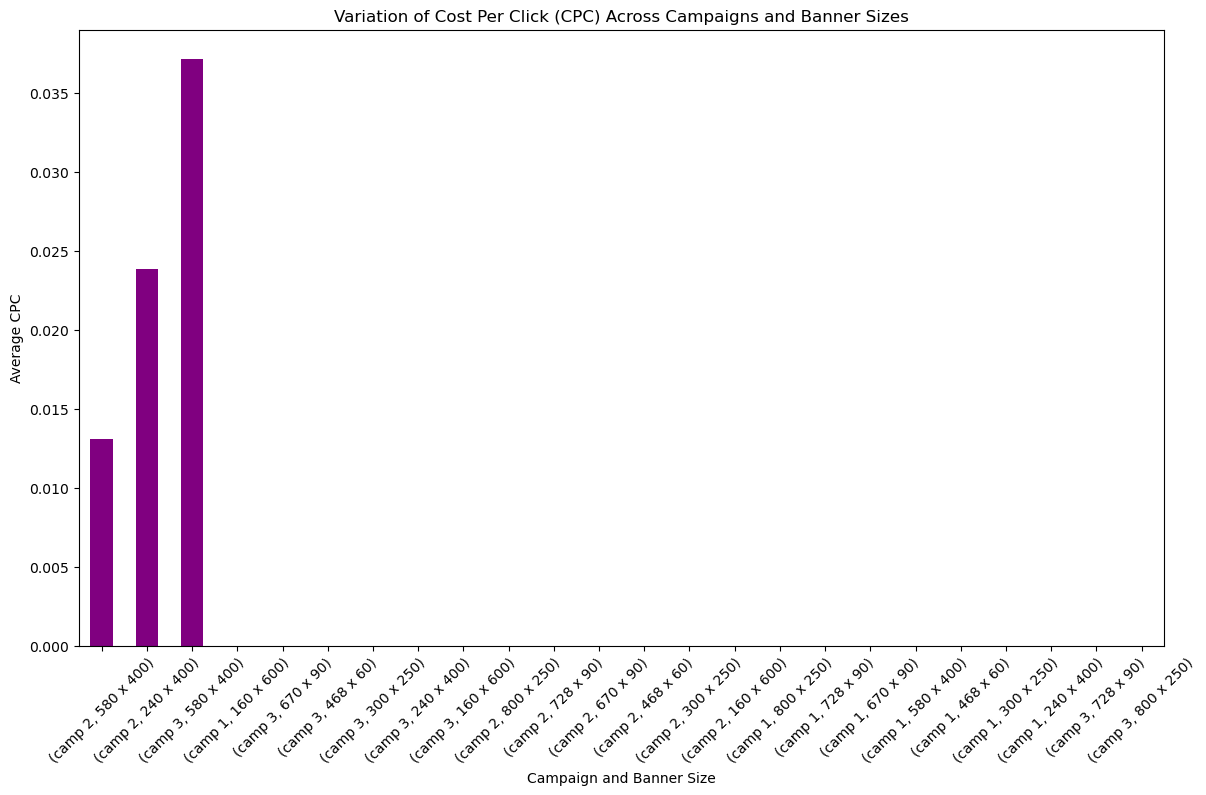

In [19]:
# Question 17: Variation of cost per click (CPC) across different campaigns and banner sizes
df_cleaned['cpc'] = df_cleaned['cost'] / df_cleaned['clicks']
cpc_variation = df_cleaned.groupby(['campaign_number', 'banner'])['cpc'].mean().sort_values()
print(cpc_variation)
plt.figure(figsize=(14, 8))
cpc_variation.plot(kind='bar', color='purple')
plt.title('Variation of Cost Per Click (CPC) Across Campaigns and Banner Sizes')
plt.xlabel('Campaign and Banner Size')
plt.ylabel('Average CPC')
plt.xticks(rotation=45)
plt.show()


                           post_click_conversions        cost  \
campaign_number placement                                       
camp 1          abc                           808     98.3361   
                jkl                         20109   2746.7036   
                ghi                        329024  52153.6716   
                mno                        254778  83968.8304   
                def                         28364  11719.4056   
camp 2          jkl                           564    548.0299   
                ghi                          6849   8229.6483   
                mno                          5330   6673.5702   
camp 3          mno                          3062   4364.2586   
                ghi                          1190   1835.2995   
camp 2          def                          1024   1585.0492   
camp 3          abc                            16     28.3304   
                jkl                           180    334.8318   
                def      

<Figure size 1000x600 with 0 Axes>

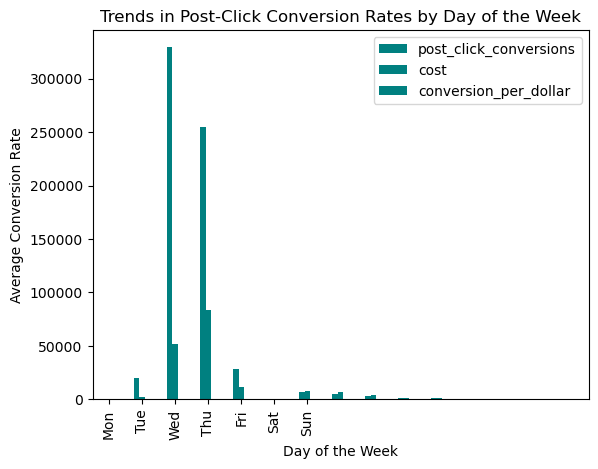

In [20]:
# Question 18: Cost-effective campaigns or placements in generating post-click conversions
cost_effective_campaigns = df_cleaned.groupby(['campaign_number', 'placement']).agg({
    'post_click_conversions': 'sum',
    'cost': 'sum'
}).assign(conversion_per_dollar=lambda x: x['post_click_conversions'] / x['cost']).sort_values(by='conversion_per_dollar', ascending=False)
print(cost_effective_campaigns)
plt.figure(figsize=(10, 6))
cost_effective_campaigns.plot(kind='bar', color='teal')
plt.title('Trends in Post-Click Conversion Rates by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Conversion Rate')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()


In [21]:
# Question 19: Trends or patterns in post-click conversion rates based on the day of the week
conversion_rate_weekday = df_cleaned.groupby('weekday')['conversion_rate'].mean()
print(conversion_rate_weekday)

weekday
0    inf
1    inf
2    inf
3    inf
4    inf
5    inf
6    inf
Name: conversion_rate, dtype: float64


In [22]:
# Question 20: Campaign effectiveness based on user engagement types in terms of post-click conversions
engagement_conversion = df_cleaned.groupby(['user_engagement', 'campaign_number'])['post_click_conversions'].sum().unstack().fillna(0)
print(engagement_conversion)

campaign_number    camp 1   camp 2  camp 3
user_engagement                           
High             617241.0      0.0  3681.0
Low                 595.0    844.0   150.0
Medium            15249.0  12923.0  1085.0
